# *Probability theory using numpy and scipy libraries*

In [ ]:
import numpy as np
import scipy.stats as sps
import ipywidgets as widgets
import matplotlib.pyplot as plt

%matplotlib inline

# 1) Изучение свойств плотности

Рассмотрим распределения:

*  Нормальное
*  Равномерное
*  Экспоненциальное
*  Гамма-распределение
*  Бета-распределение

Построим график плотности. Сгенерируем наборы случайных величин из каждого распределения и построим по ним гистограмму.




In [ ]:
# Построение графика плотности непрерывного распределения
def show_pdf(pdf, xmin, xmax, ymax, grid_size=100, **kwargs):
    """
    pdf -- плотность
    xmin, xmax -- границы графика по оси x
    ymax -- граница графика по оси y
    grid_size -- размер сетки, по которой рисуется график
    kwargs -- параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)
    
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=3, color = 'deepskyblue')
    plt.grid(ls=':')
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    plt.show()
    

# Нормальное распределениe

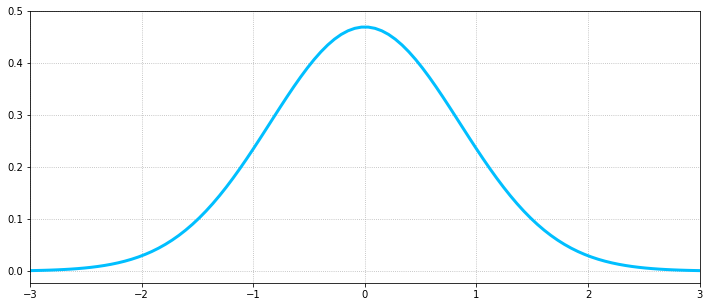

In [ ]:
show_pdf(sps.norm.pdf, -3, 3, 0.5, scale=0.85)

In [ ]:
# Cоздание виджета.
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.norm.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=2, step=0.01, value=1));

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

Output()

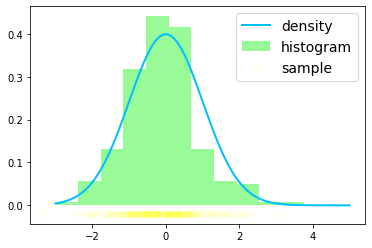

In [ ]:
grid = np.linspace(-3, 5, 1000) 
sample = sps.norm.rvs(size=200)
plt.figure()
plt.scatter(sample, np.zeros(200) - 0.02, alpha=0.05, color = 'yellow', label='sample')
plt.hist(sample, range=(-3, 5), bins=13, density=True, color = 'palegreen', label='histogram')
plt.plot(grid, sps.norm.pdf(grid), color='deepskyblue', lw=2, label='density')
plt.legend(fontsize=14, loc=1)
plt.show()

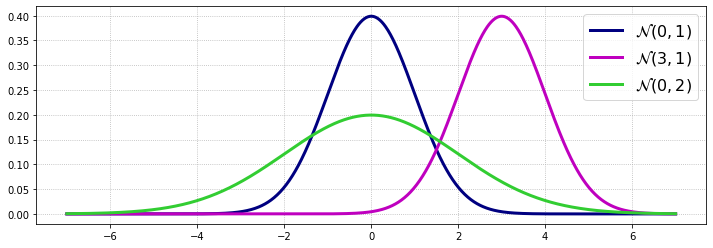

In [ ]:
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
a_list = [0, 3, 0]  # набор значений параметра a
sigma_list = [1, 1, 2]  # набор значений параметра sigma

plt.figure(figsize=(12, 4))
for i, (a, sigma, color) in enumerate(zip(a_list, sigma_list, ['navy', 'm', 'limegreen'])):
    plt.plot(grid, sps.norm(a, sigma).pdf(grid), color=color, lw=3, 
             label='$\mathcal{N}' + '({}, {})$'.format(a, sigma))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()


Вывод: Для нормального распределения:

параметр $\alpha$ отвечает за (вдоль оси X);
параметр $\beta$ отвечает за (сжатие/растяжение по оси Y).
# Равномерное распределение.

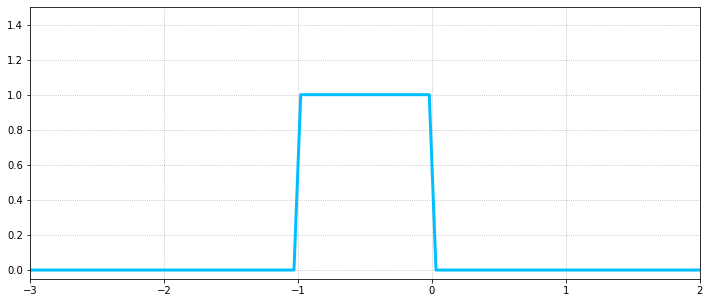

In [ ]:
show_pdf(sps.uniform(-1, 1).pdf, -3, 2, 1.5)

In [ ]:
# создание виджета
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.uniform.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1.4),
                         loc=widgets.FloatSlider(min=-4, max=0, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=4, step=0.01, value=1));

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

Output()

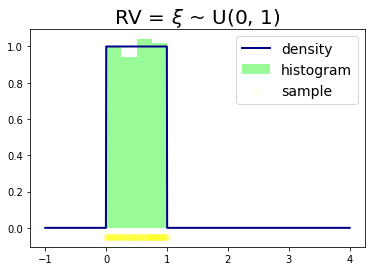

In [ ]:
grid = np.linspace(-1, 4, 1000)  # сетка для построения графика
sample = sps.uniform.rvs(size=200)
plt.figure()
plt.scatter(sample, np.zeros(200) - 0.05, alpha=0.05, color = 'yellow', label='sample')
plt.hist(sample, range=(-1, 4), bins=20, density=True, label='histogram', color='palegreen')
plt.plot(grid, sps.uniform.pdf(grid), color='darkblue', lw=2, label='density')
plt.title(r'RV = $\xi$ ~ U(0, 1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

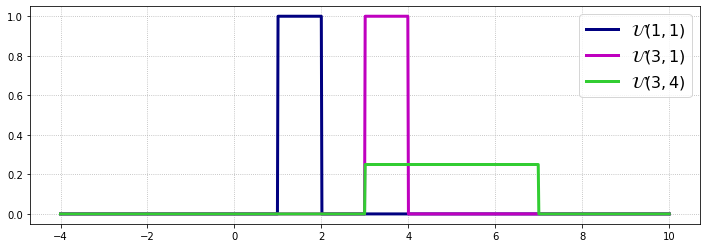

In [ ]:
grid = np.linspace(-4, 10, 1000)  # сетка для построения графика
a_list = [1, 3, 3]  # набор значений параметра a
b_list = [1, 1, 4]  # набор значений параметра b

plt.figure(figsize=(12, 4))
for i, (a, b, color) in enumerate(zip(a_list, b_list, ['navy', 'm', 'limegreen'])):
    plt.plot(grid, sps.uniform(a, b).pdf(grid), color=color, lw=3, 
             label='$\mathcal{U}' + '({}, {})$'.format(a, b))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

Вывод: Для равномерного распределения:

параметр $\alpha$ отвечает за (вдоль оси X);
параметр $\beta$  отвечает за (сжатие/растяжение по оси Y).
# Экспоненциальное распределение

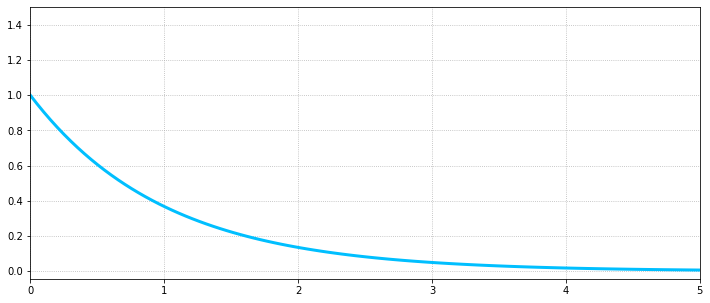

In [ ]:
show_pdf(sps.expon(scale=1).pdf, 0, 5, 1.5)

In [ ]:
# создать виджет, но не отображать его
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.expon.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=175),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1.4),
                         loc=widgets.FloatSlider(min=-4, max=0, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=4, step=0.01, value=1));

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

Output()

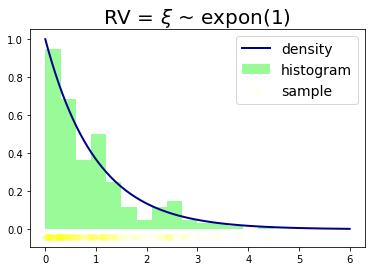

In [ ]:
grid = np.linspace(0, 6, 1000) 
sample = sps.expon.rvs(size=200)
plt.figure()
plt.scatter(sample, np.zeros(200) - 0.04, alpha=0.05, color = 'yellow', label='sample')
plt.hist(sample, range=(0, 6), bins=20, density=True, label='histogram', color='palegreen')
plt.plot(grid, sps.expon.pdf(grid), color='darkblue', lw=2, label='density')
plt.title(r'RV = $\xi$ ~ expon(1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

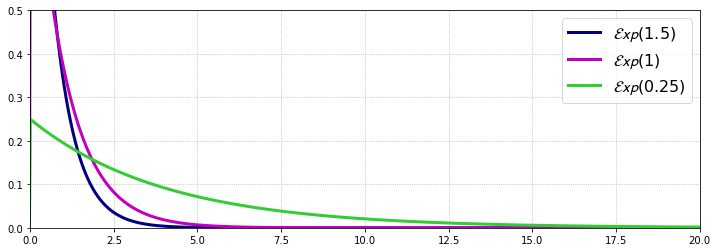

In [ ]:
grid = np.linspace(-2, 20, 1000)  # сетка для построения графика
lambda_list = [1.5, 1, 0.25]  # набор значений параметра lambda

plt.figure(figsize=(12, 4))
for i, (l, color) in enumerate(zip(lambda_list, ['navy', 'm', 'limegreen'])):
    plt.plot(grid, sps.expon(scale=1/l).pdf(grid), color=color, lw=3, 
             label='$\mathcal{Exp}' + '({})$'.format(l))
plt.legend(fontsize=16)
plt.ylim((0, 0.5))
plt.xlim((0, 20))
plt.grid(ls=':')
plt.show()


Вывод: Для экспоненциального распределения:

параметр  отвечает за (чем меньше параметр, тем больше масштаб, то есть больше растяжение по оси Y).
# Гамма распределение

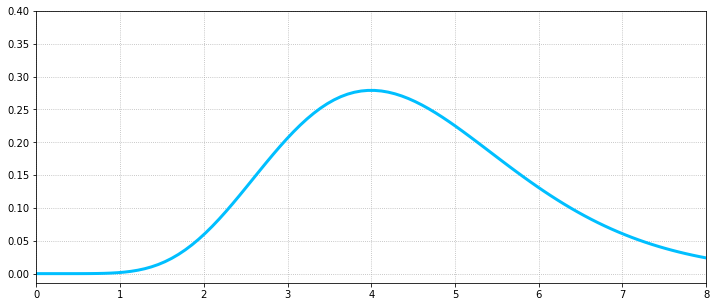

In [ ]:
show_pdf(sps.gamma(a=9, scale=0.5).pdf, 0, 8, 0.4)

In [ ]:
# создание виджета
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.gamma.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=100, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1.4),
                         a = widgets.FloatSlider(min=0, max=100, step=0.1, value=2),
                         scale=widgets.FloatSlider(min=0.01, max=4, step=0.01, value=1));

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

Output()

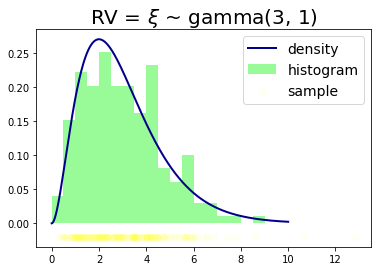

In [ ]:
grid = np.linspace(0, 10, 1000) 
sample = sps.gamma.rvs(a=3, size=200)
plt.figure()
plt.scatter(sample, np.zeros(200) - 0.02, alpha=0.05, color = 'yellow', label='sample')
plt.hist(sample, range=(0, 10), bins=20, density=True, label='histogram', color='palegreen')
plt.plot(grid, sps.gamma.pdf(grid, a=3), color='darkblue', lw=2, label='density')
plt.title(r'RV = $\xi$ ~ gamma(3, 1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

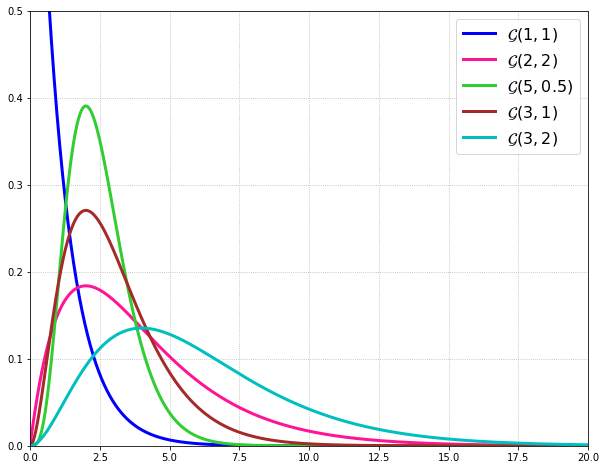

In [ ]:
grid = np.linspace(0, 20, 1000)  # сетка для построения графика
alpha_list = [1, 2, 5, 3, 3]  # набор значений параметра a
beta_list = [1, 2, 0.5, 1, 2]  # набор значений параметра b

plt.figure(figsize=(10, 8))
for i, (alpha, beta, color) in enumerate(zip(alpha_list, beta_list,
                                             ['b', 'deeppink', 'limegreen', 'brown', 'c'])):
    plt.plot(grid, sps.gamma(a=alpha, scale=beta).pdf(grid), color=color, lw=3, 
             label='$\mathcal{G}' + '({}, {})$'.format(alpha, beta))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.ylim((0, 0.5))
plt.xlim((0, 20))
plt.show()

Вывод: Для гамма-распределения:

параметр α отвечает за (то есть за то на сколько график перекосится);
параметр β отвечает за (сжатие/растяжение вдоль оси Y).

# Бета распределение

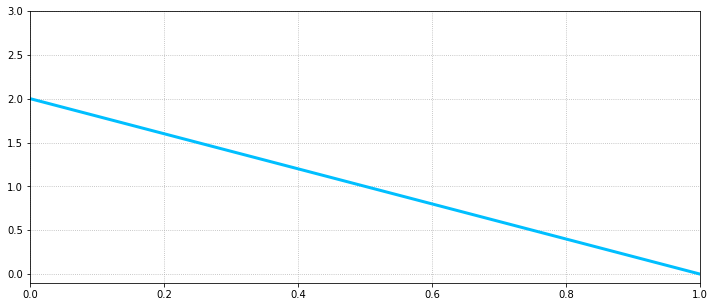

In [ ]:
show_pdf(sps.beta(1, 2).pdf, 0, 1, 3)

In [ ]:
# создание виджета
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.beta.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-1, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=2, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=10, step=0.1, value=3),
                         a = widgets.FloatSlider(min=0, max=10, step=0.1, value=1),
                         b = widgets.FloatSlider(min=0, max=10, step=0.1, value=1),
                         loc=widgets.FloatSlider(min=-4, max=4, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=4, step=0.01, value=1));

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

Output()

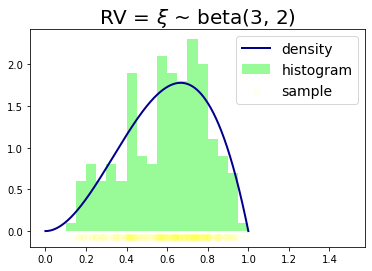

In [ ]:
grid = np.linspace(0, 1, 1000) 
sample = sps.beta.rvs(a=3, b=2, size=200)
plt.figure()
plt.scatter(sample, np.zeros(200) - 0.07, alpha=0.05, color = 'yellow', label='sample')
plt.hist(sample, range=(0, 1.5), bins=30, density=True, label='histogram', color = 'palegreen')
plt.plot(grid, sps.beta.pdf(grid, a=3, b=2), color='darkblue', lw=2, label='density')
plt.title(r'RV = $\xi$ ~ beta(3, 2)', fontsize=20)
plt.legend(fontsize=14, loc=1)

plt.show()

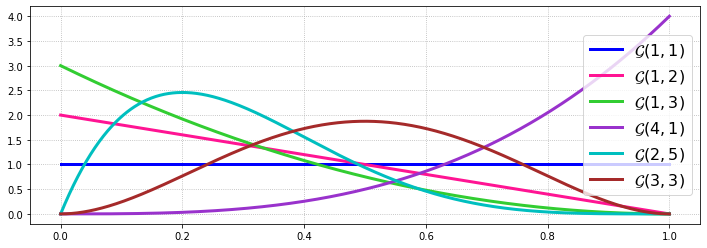

In [ ]:
grid = np.linspace(0, 1, 1000)  # сетка для построения графика
alpha_list = [1, 1, 1, 4, 2, 3]  # набор значений параметра a
beta_list = [1, 2, 3, 1, 5, 3]  # набор значений параметра b

plt.figure(figsize=(12, 4))
for i, (alpha, beta, color) in enumerate(zip(alpha_list, beta_list, 
                                             ['b', 'deeppink', 'limegreen', 'darkorchid', 'c', 'brown'])):
    plt.plot(grid, sps.beta(a=alpha, b=beta).pdf(grid), color=color, lw=3, 
             label='$\mathcal{G}' + '({}, {})$'.format(alpha, beta))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

**Вывод: Для бетта-распределения:**

если параметр  α < 1 и параметр  β < 1, то график вогнутый
если один из параметров  и  равен 1, а другой лежит в промежутке от 1 до 2, то график выпуклый
если один из параметров равен 1, а другой больше 2, то график вогнутый
если один из параметров равен 1, а другой 2, то график - прямая

**Вывод по гистограммам:**

для каждого из построенных распределений гистограмма выборки из 200 случайных величин примерно совпадает с областью под графиком плотности соответствующего распределения. Это подтверждает интуитивный смысл определения плотности распределения - чем чаще случайная величина попадает в окрестность некоторой точки, тем выше соответствующий столбец гистограммы и, очевидно, плотность распределения в окрестности данной точки также выше.

# 2) Скажем, что имеется симметричная монета. Напишем функции генерации независимых случайных величин из некоторых распределений.
Напишем функцию генерации случайных величин из равномерного распределения на отрезке .

Для этого запишем случайную величину $ξ ∼ U[0, 1]$ в двоичной системе системе счисления ξ = 0, $ξ_1,ξ_2,ξ_3...$ Тогда $ξ ∼ Bern(1/2)$ и есть независимость в совокупности.


In [ ]:
coin = sps.bernoulli(0.5).rvs  # симметричная монета
# coin(size=10) --- реализация 10 бросков монеты

def uniform(size=1, precision=30):
    return (coin(np.hstack((size, precision)))/(2.**(np.arange(precision)+1))).sum(axis=np.array(size).size)


Для $U[0,1]$ сгенерируем 200 независимых случайных величин, построим график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам.

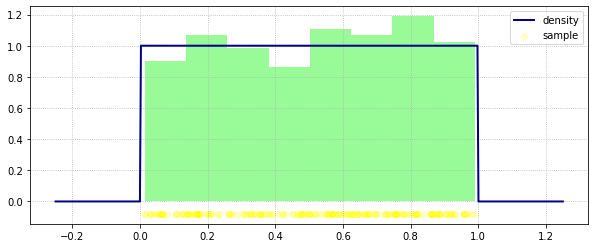

In [ ]:
size = 200
grid = np.linspace(-0.25, 1.25, 500)
sample = uniform(size, precision=50)

plt.figure(figsize=(10, 4))
# отображаем значения случайных величин полупрозрачными точками
plt.scatter(sample, np.zeros(size) - 0.08, alpha=0.2, color = 'yellow', label='sample')
# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(sample, bins=8, density=True, color='palegreen')
# рисуем график плотности
plt.plot(grid, sps.uniform.pdf(grid), color='darkblue', lw=2, label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

Реализованная функция uniform работает правильно, так как построенная гистограмма похожа на область под графиком плотности равномерного распределения.

**Исследуем, как меняются значения случайных величин в зависимости от precision.**

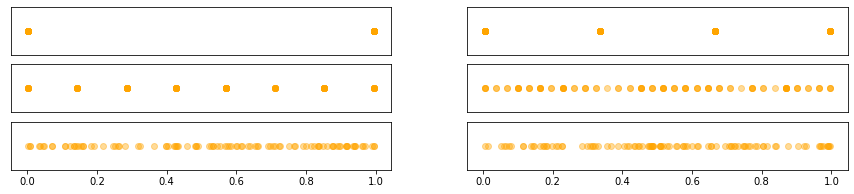

In [ ]:
size = 100

plt.figure(figsize=(15, 3))
for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(uniform(size, precision), 
                np.zeros(size), alpha=0.4, color = 'orange')
    plt.yticks([])
    if i < 4: plt.xticks([])
plt.show()

Вывод:

с увеличением точности генерации равномерно распределенной случайной величины увеличивается диапазон принимаемых ею значений.

precision = 1: для генерации $\xi\sim U(0,1)$  задействовано одно подбрасывание монеты, поэтому $\xi$ может принимать всего два значения - на графике это проиллюстрировано $\leq min(2,size)$  точками.

precision = 2: для генерации  $\xi\sim U(0,1)$  задействовано два подбрасывания монеты, поэтому  $\xi$  может принимать четыре значения - на графике это проиллюстрировано $\leq min(4,size)$   точками.

precision = 3: для генерации  $\xi\sim U(0,1)$  задействовано три подбрасывания монеты, поэтому $\xi$  может принимать восемь значений - на графике это проиллюстрировано  $\leq min(8,size)$  точками.

precision = 5: для генерации  $\xi\sim U(0,1)$  задействовано пять подбрасываний монеты, поэтому $\xi$  может принимать 32 значения - на графике это проиллюстрировано $\leq min(32,size)$    точками.

precision = 10: для генерации  $\xi\sim U(0,1)$   задействовано десять подбрасывания монеты, поэтому $\xi$  может принимать 1024 значения - на графике это проиллюстрировано  $\leq min(1024,size)$  точками.

precision = 30: для генерации  $\xi\sim U(0,1)$  задействовано тридцать подбрасываний монеты, поэтому $\xi$  может принимать $2^{30}$
 значений - на графике это проиллюстрировано  $\leq min(2,size)$ 
 точками.

**Напишем функцию генерации случайных величин в количестве size штук из распределения $\mathcal{N}(loc, scale^2)$
 с помощью преобразования Бокса-Мюллера.**

In [ ]:
def normal(size=1, loc=0, scale=1, precision=30):
    
    #если размерность size равна 1, то для удобства приводим size к tuple
    if type(size) != tuple:
        s = (size, )
    else:
        s = size
        
    #генерируем равномерно распределенные случайные величины
    xi = uniform(int((np.prod(s)-np.prod(s)%2)/2), precision)
    teta = uniform(int((np.prod(s)-np.prod(s)%2)/2), precision)
    
    #защищищаемся от случая, когда teta = 0, потому что в этом случае далее берется ln(0)
    teta = teta + 0.5**(precision+5)
    
    #вычисляем тригонометрические множители из преобразования Бокса-Мюллера
    factor_cos = np.cos(2*np.pi*xi)
    factor_sin = np.sin(2*np.pi*xi)
    
    #вычисляем общий множитель из преобразования Бокса-Мюллера
    factor_sqrt = np.sqrt(-2*np.log(teta))
    
    #вычисляем значения нормально распределенных случайных величин
    part1 = factor_cos*factor_sqrt
    part2 = factor_sin*factor_sqrt
    
    #рассматриваем случай, когда от функции требуют нечетную выборку
    if np.prod(s)%2 == 1:
        #отдельно вычисляем еще одно значение случайной величины
        xi = uniform(1, precision)
        teta = uniform(1, precision)
        add = np.cos(2*np.pi*xi)*np.sqrt(-2*np.log(teta))
        #объединение полученных выборок
        result = np.hstack((part1, part2, add))
        return result.reshape(s)
    else:
        #объединение полученных выборок
        result = np.hstack((part1, part2))
        return result.reshape(s)
    

Для $\mathcal{N}(0, 1)$ сгенерируем 200 независимых случайных величин, построим график плотности на отрезке $[-3,3], а также гистограмму по сгенерированным случайным величинам.

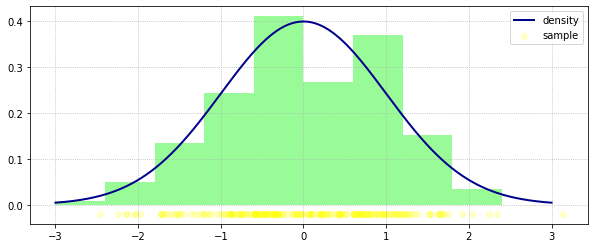

In [ ]:
size = 200
sample = normal(size)
grid = np.linspace(-3, 3, 500)

plt.figure(figsize=(10, 4))
# отображаем значения случайных величин полупрозрачными точками
plt.scatter(sample, np.zeros(size) - 0.02, alpha=0.2, color = 'yellow', label='sample')
# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(sample, bins=10, range = (-3, 3), density=True, color='palegreen')
# рисуем график плотности
plt.plot(grid, sps.norm.pdf(grid), color='darkblue', lw=2, label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

Вывод:

Имея возможность сгенерировать равномерно распределенную случайную величину, можно сгенерировать нормально распределенную случайную величину при помощи преобразований Бокса-Мюллера. Реализованная функция normal работает правильно, так как построенная гистограмма похожа на область под графиком плотности нормального распределения.

**Напишем функцию генерации выборки многомерного нормального распределения с заданным вектором средних *mean* и матрицей ковариаций *cov_matrix*. Используем теорему об эквивалентных определениях гауссовского вектора.**

Исследуем, как меняются значения случайных величин в зависимости от precision.



In [ ]:
from scipy.linalg import eigh

In [ ]:
def gauss(mean, cov_matrix, size=1, precision=30):
    # Преобразование типов
    mean = np.array(mean)
    cov_matrix = np.array(cov_matrix)
    
    # Проверка на корректность входа
    assert mean.ndim == 1 and cov_matrix.ndim == 2
    assert mean.shape[0] == cov_matrix.shape[0]
    assert cov_matrix.shape[0] == cov_matrix.shape[1]
    
    specter = eigh(cov_matrix)[0]
    D = specter*np.array([[1, 0], [0, 1]])
    D = np.sqrt(D)
    B = np.matmul(eigh(cov_matrix)[1], D)
    normal_rv = normal(size*mean.size, precision).reshape(mean.size, size)
    F = np.matmul(B, (normal_rv))
    return mean + F.transpose()

Сгенерируем 200 случайных векторов из двумерного нормального распределения с нулевым вектором средних и матрицей ковариаций  $\begin{pmatrix}2 & 1 \\ 1 & 2\end{pmatrix}$
 . Нанесём сгенерированные точки на график и отметим цветом значение плотности.

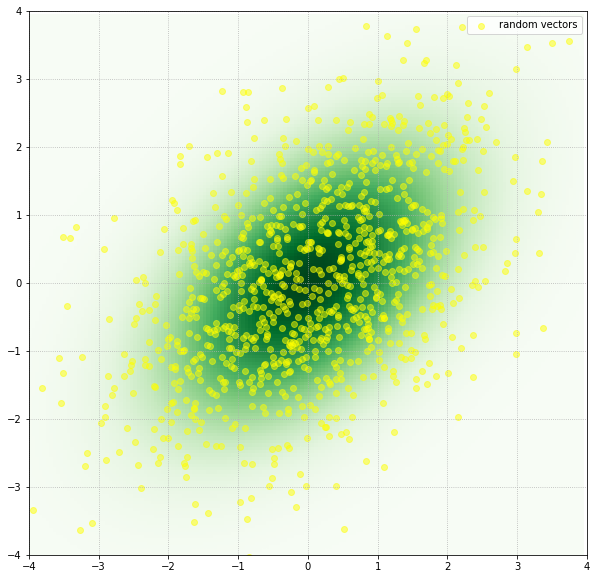

In [ ]:
size = 1000
mean = [0, 0]
cov_matrix=[[2,1], [1,2]]
sample = gauss(mean, cov_matrix, size=1000)  # Генерация векторов
grid = np.mgrid[-4:4:0.05, -4:4:0.05]
c = np.hstack((grid[0].reshape(grid[0].size, 1),
               grid[1].reshape(grid[1].size, 1))).reshape(len(grid[0]), len(grid[0]), 2)
density = sps.multivariate_normal.pdf(c, mean=mean, cov=cov_matrix)
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Greens')
plt.scatter(sample[:, 0], sample[:, 1], alpha=0.5, color='yellow', label='random vectors')
plt.legend()
plt.grid(ls=':')
plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.show()

Вывод:

По графику видно, что случайная величина, имеющая многомерное нормальное распределение, чаще принимает значения в местах большей плотности данного распределения. Значит, мы верно реализовали функцию генерации случайных величин, имеющих многомерное распределение.

**Напишем функцию генерации случайных величин из экспоненциального распределения.**

In [ ]:
def expon(size=1, lambd=1, precision=30):
    return -(np.log(1-uniform(size, precision))/lambd)

Для $Exp(1)$  сгенерируем 200 независимых случайных величин, построим график плотности на отрезке $[-0.5, 5]$, а также гистограмму по сгенерированным случайным величинам.

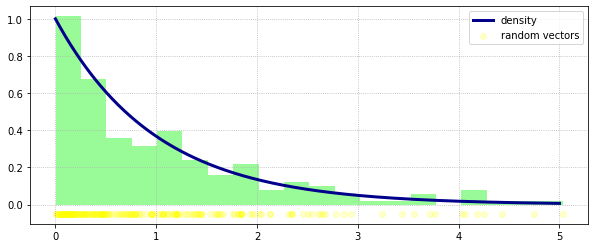

In [ ]:
size = 200
sample = expon(size)
grid = np.linspace(0, 5, 500)

plt.figure(figsize=(10, 4))
# отображаем значения случайных величин полупрозрачными точками
plt.scatter(sample, np.zeros(size) - 0.05, alpha=0.2, color = 'yellow', label='random vectors')
# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(sample, bins=20, density=True, color='palegreen')
# рисуем график плотности
plt.plot(grid, sps.expon.pdf(grid), 
         color='darkblue', lw=3, label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

Вывод:

При помощи генерации равномерно распределенной случайной величины можно сгенерировать экспоненциально распределенную случайную величину.

Пусть  $\xi \sim U(0, 1)$, $\eta=\large{\frac{-ln(1-\xi)}{\lambda}}$. Тогда:
$F_{\eta}(x)=P(\eta \leq x)=P(\large{\frac{-ln(1-\xi)}{\lambda}} \leq x)=P(-ln(1-\xi) \leq \lambda x)=P(ln(1-\xi)\ge -\lambda x) = P(1- \xi \ge \exp^{-\lambda x})=p(\xi \leq 1-\exp^{-\lambda x})=1-\exp^{-\lambda x}=F_{\eta}(x)$


Получаем, что  $\eta \sim expon(\lambda)$. Мы использовали тот факт, что для  $\xi \sim U(0, 1)$ функция распределения 
$F_{\xi}(x)=x$

#3) Визуализируем закон больших чисел.
Пусть $\xi_1, ... ,\xi_n$ независимые случайные величины из распределения $\mathcal{N}(a, \sigma^2)$ 
. Согласно закону больших чисел выполнена сходимость $\frac{\xi_1 + ... + \xi_n}{n} \stackrel{п.н.}{\to}$  Покажем это, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов среднее в зависимости от размера набора. Нанесём на один график зависимость среднего значения от кол-ва элементов.

Выполним эти же действия для распределений $Exp(1)$ и $Pois(1)$.


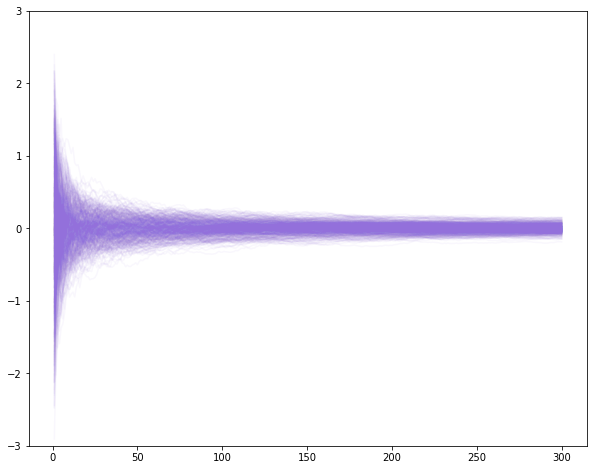

In [ ]:
grid = np.arange(1, 301, 1)
sample = sps.norm.rvs(size=(500, 300)) # генерируем 500 наборов
number = np.fromfunction(lambda i: i + 1, (300,))
means = sample.cumsum(axis=1)/number # среднее значение

plt.figure(figsize=(10, 8))
for i in range (500):
    plt.plot(grid, means[i,...], alpha=0.05, color='mediumpurple')
plt.ylim((-3, 3))
plt.show()

Имеем 500 кривых, каждая из которых соответствует выборке из 300 нормально распределенных случайных величин. На данном графике изображена зависимость среднего арифметического частичных сумм соответствующих случайных величин от количества слагаемых в этой сумме. По графику видно, что с увеличением числа слагаемых каждая из 500 кривых все ближе "прижимается" к прямой y = 0. Математическое ожидание $\mathcal{N(0, 1)}$ равно нулю, соответственно построенный график подтверждает закон больших чисел с точностью до 300 испытаний.

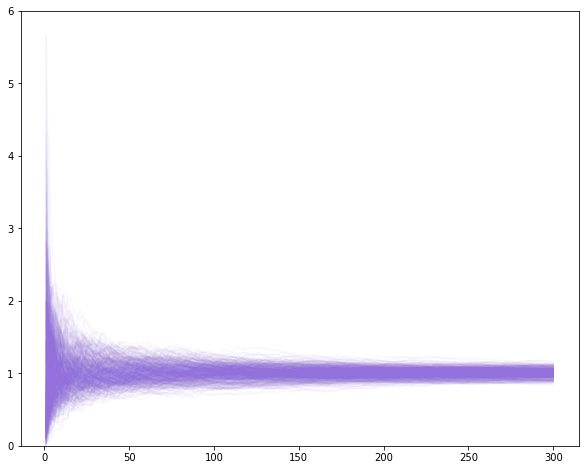

In [ ]:
sample = sps.expon.rvs(size=(500, 300)) # генерируем 500 наборов
means = sample.cumsum(axis=1)/number # среднее значение

plt.figure(figsize=(10, 8))
for i in range (500):
    plt.plot(grid, means[i,...], alpha=0.05, color='mediumpurple')
plt.ylim((0, 6))
plt.show()

Имеем 500 кривых, каждая из которых соответствует выборке из 300 экспоненциально распределенных случайных величин. На данном графике изображена зависимость среднего арифметического частичных сумм соответствующих случайных величин от количества слагаемых в этой сумме. По графику видно, что с увеличением числа слагаемых каждая из 500 кривых все ближе "прижимается" к прямой y = 1. Математическое ожидание $expon(1)$  равно 1, соответственно построенный график подтверждает закон больших чисел с точностью до 300 испытаний.

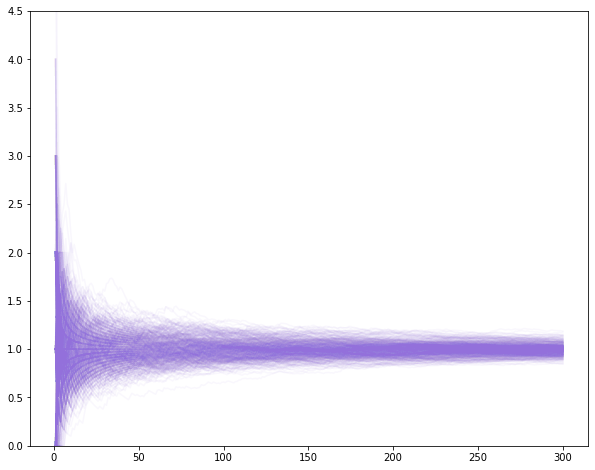

In [ ]:
sample = sps.poisson.rvs(mu=1, size=(500, 300)) # генерируем 500 наборов
means = sample.cumsum(axis=1)/number # среднее значение

plt.figure(figsize=(10, 8))
for i in range (500):
    plt.plot(grid, means[i,...], alpha=0.05, color='mediumpurple')
plt.ylim((0, 4.5))
plt.show()

Имеем 500 кривых, каждая из которых соответствует выборке из 300 пуассоновски распределенных случайных величин. На данном графике изображена зависимость среднего арифметического частичных сумм соответствующих случайных величин от количества слагаемых в этой сумме. По графику видно, что с увеличением числа слагаемых каждая из 500 кривых все ближе "прижимается" к прямой y = 1. Математическое ожидание $Pois(1)$ равно 1, соответственно построенный график подтверждает закон больших чисел с точностью до 300 испытаний.

Вывод:

Для  $\mathcal{N}(0, 1)$ имеем $\mu$= 0.
Для  $Pois(1)$ имеем $\mu$ = 1.
Для  $expon(1)$ имеем $\mu$ = 1.

Из построенных графиков мы видим, что при увеличении числа испытаний среднее значение случайной величины все больше приближается к прямой $y = \mu$, где $\mu$ - значение математического ожидания данного распределения. Это именно то, что утверждает закон больших чисел - среднее значение конечной выборки из фиксированного распределения близко к математическому ожиданию этого распределения. Таким образом, мы экспериментально подтвердили закон больших чисел.

#4)Визуализируем центральную предельную теорему.

Пусть $\xi_1, ..., \xi_n$ - независимые случайные величины из распределения $\xi_1, ..., \xi_n$. Согласно центральной предельной теореме выполнена сходимость $Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\to} \mathcal{N}(0, 1)$, где $X_n = \sum\limits_{i=1}^n \xi_i$
. Покажем это, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$
 в зависимости от размера набора. Для каждого $j$ нанесём на один график зависимость $Z_{jn}$ от $n$. Для  по набору случайных величин Z$_{1,300}, ..., Z_{500,300}$ построим гистограмму.

Повторим те же действия для распределений $U(0,1)$ и $Pois(1)$.


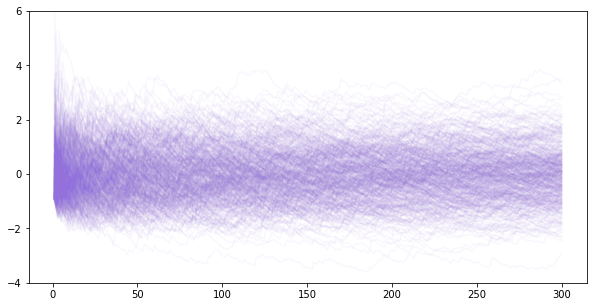

In [ ]:
grid = np.arange(1, 301, 1)
sample = sps.expon.rvs(size=(500, 300)) # генерируем 500 наборов
means = sample.cumsum(axis=1)
expectation = means.mean(axis=0) # математическое ожидание
dispersion = means.var(axis = 0) # дисперсия
sqroot = dispersion** .5 # квадратный корень из дисперсии
z = (means - expectation)/sqroot

plt.figure(figsize=(10, 5))
for i in range (500):
    plt.plot(grid, z[i,...], alpha=0.05, color='mediumpurple')
plt.ylim((-4, 6))
plt.show()


Имеем 500 кривых, каждая из которых соответствует выборке из 300 экспоненциально распределенных случайных величин. На данном графике изображена зависимость величины $(S_n - ES_n)/\sqrt{DS_n}$
 от количества слагаемых в этой сумме, сделано это для 500 выборок. По графику видно, что с увеличением числа слагаемых кривые не сходятся к определенной константе.

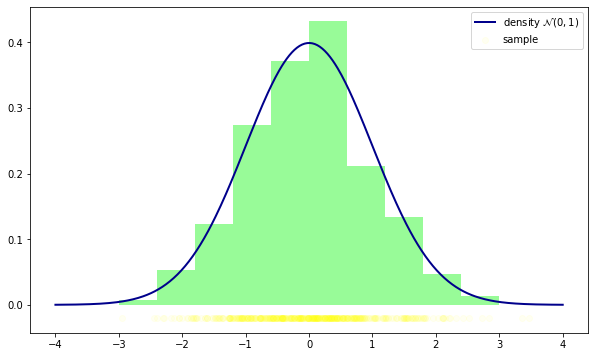

In [ ]:
grid = np.linspace(-4, 4, 400)  # задаем сетку для построения графика плотности
plt.figure(figsize=(10, 6))
plt.scatter(z[...,-1], np.zeros(500) - 0.02, alpha=0.05, label='sample', color = 'yellow')
plt.hist(z[...,-1], range=(-3, 3), bins=10, density=True, color = 'palegreen')
plt.plot(grid, sps.norm.pdf(grid), color='darkblue', lw=2, label='density $\mathcal{N}(0, 1)$')
plt.legend()  # добавляет легенду
plt.show()

На данном графике изображена гистограмма, построенная по 500 значениям случайных величин $(S_{300} - ES_{300})/\sqrt{DS_{300}}$, где $S_{300}=\xi_1+...+\xi_{300}$
каждая величина $\xi_i$ имеет экспоненциальное распределение. Также на данном графике изображена кривая, соответствующая плотности нормального распределения с параметрами 0 и 1. Нетрудно заметить, что построенная гистограмма примерно совпадает с областью под графиком плотности нормального распределения.

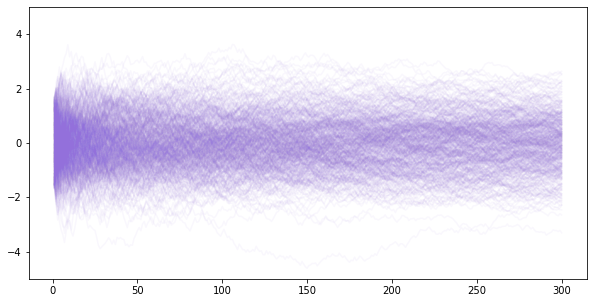

In [ ]:
grid = np.arange(1, 301, 1)
sample = sps.uniform.rvs(size=(500, 300)) # генерируем 500 наборов
means = sample.cumsum(axis=1)
expectation = means.mean(axis=0) # математическое ожидание
dispersion = means.var(axis = 0) # дисперсия
sqroot = dispersion** .5 # квадратный корень из дисперсии
z = (means - expectation)/sqroot

plt.figure(figsize=(10, 5))
for i in range (500):
    plt.plot(grid, z[i,...], alpha=0.05, color='mediumpurple')
plt.ylim((-5, 5))
plt.show()

Имеем 500 кривых, каждая из которых соответствует выборке из 300 нормально распределенных случайных величин. На данном графике изображена зависимость величины $(S_n - ES_n)/\sqrt{DS_n}$
 от количества слагаемых в этой сумме, сделано это для 500 выборок. По графику видно, что с увеличением числа слагаемых кривые не сходятся к определенной константе.

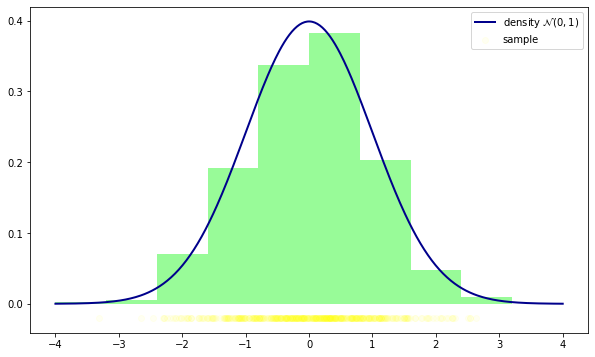

In [ ]:
grid = np.linspace(-4, 4, 400)  # задаем сетку для построения графика плотности
plt.figure(figsize=(10, 6))
plt.scatter(z[...,-1], np.zeros(500) - 0.02, alpha=0.05, label='sample', color = 'yellow')
plt.hist(z[...,-1], range=(-4, 4), bins=10, density=True, color = 'palegreen')
plt.plot(grid, sps.norm.pdf(grid), color='darkblue', lw=2, label='density $\mathcal{N}(0, 1)$')
plt.legend()  # добавляет легенду
plt.show()

На данном графике изображена гистограмма, построенная по 500 значениям случайных величин $(S_{300} - ES_{300})/\sqrt{DS_{300}}$, где $S_{300}=\xi_1+...+\xi_{300}$
каждая величина $\xi_i$ имеет нормальное распределение. Также на данном графике изображена кривая, соответствующая плотности нормального распределения с параметрами 0 и 1. Нетрудно заметить, что построенная гистограмма примерно совпадает с областью под графиком плотности нормального распределения.

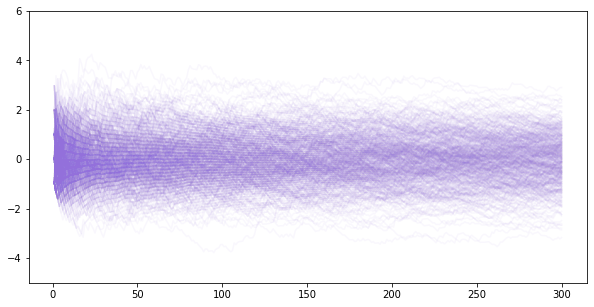

In [ ]:
grid = np.arange(1, 301, 1)
sample = sps.poisson.rvs(mu=1, size=(500, 300)) # генерируем 500 наборов
means = sample.cumsum(axis=1)
expectation = means.mean(axis=0) # математическое ожидание
dispersion = means.var(axis = 0) # дисперсия
sqroot = dispersion** .5 # квадратный корень из дисперсии
z = (means - expectation)/sqroot

plt.figure(figsize=(10, 5))
for i in range (500):
    plt.plot(grid, z[i,...], alpha=0.05, color='mediumpurple')
plt.ylim((-5, 6))
plt.show()

Имеем 500 кривых, каждая из которых соответствует выборке из 300 пуассоновски распределенных случайных величин. На данном графике изображена зависимость величины $(S_n - ES_n)/\sqrt{DS_n}$
 от количества слагаемых в этой сумме, сделано это для 500 выборок. По графику видно, что с увеличением числа слагаемых кривые не сходятся к определенной константе.

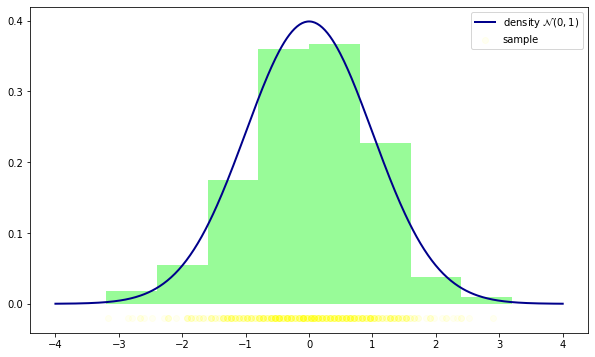

In [ ]:
grid = np.linspace(-4, 4, 400)  # задаем сетку для построения графика плотности
plt.figure(figsize=(10, 6))
plt.scatter(z[...,-1], np.zeros(500) - 0.02, alpha=0.05, label='sample', color = 'yellow') 
plt.hist(z[...,-1], range=(-4, 4), bins=10, density=True, color = 'palegreen')
plt.plot(grid, sps.norm.pdf(grid), color='darkblue', lw=2, label='density $\mathcal{N}(0, 1)$')
plt.legend()  # добавляет легенду
plt.show()

На данном графике изображена гистограмма, построенная по 500 значениям случайных величин $(S_{300} - ES_{300})/\sqrt{DS_{300}}$, где $S_{300}=\xi_1+...+\xi_{300}$
каждая величина $\xi_i$ имеет имеет пуассоновское распределение. Также на данном графике изображена кривая, соответствующая плотности нормального распределения с параметрами 0 и 1. Нетрудно заметить, что построенная гистограмма примерно совпадает с областью под графиком плотности нормального распределения.

**Вывод:**

Центральная предельная теоремма утверждает, что сумма достаточно большого количества слабо зависимых случайных величин примерно одинакового масштаба, имеет распределение, близкое к нормальному. Как мы заметили ранее, все построенные гистограммы похожи на плотность нормального распределения, поэтому эксперементальные данные подтверждают центральную предельную теорему.